In [1]:
%matplotlib inline

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

import numpy as np
import pandas as pd

from IPython.display import display


print(sys.version)
print(pd.__version__)



3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
0.19.1


In [2]:

####################################################################################################
####################################################################################################

dir_pred = "sbatch/predictions/cpu/"

file_hdf = dir_pred + 'dnn_s2waveforms-xy_ts0010_e50_mse_adam_ac9947_layers1270-1270-127-2.hdf5'


df_xy    = pd.read_hdf(file_hdf)
print(df_xy.shape)
display(df_xy[0:5][:])
print()



(20967, 4)


,x_pred,y_pred,x_true,y_true
0,11.969422,-4.003383,11.452923,-4.799238
1,18.841068,-14.485405,19.004622,-14.180182
2,0.418787,-28.846260,-0.713852,-30.766731
3,-30.512405,-15.772439,-31.193504,-19.178736
4,15.201070,-12.076445,15.701762,-12.451200


In [3]:

####################################################################################################
####################################################################################################

arr_x_true  = df_xy[:]['x_true'].as_matrix()
arr_x_pred  = df_xy[:]['x_pred'].as_matrix()

arr_y_true  = df_xy[:]['y_true'].as_matrix()
arr_y_pred  = df_xy[:]['y_pred'].as_matrix()

arr_r2_true = np.square(arr_x_true) + np.square(arr_y_true)
arr_r2_pred = np.square(arr_x_pred) + np.square(arr_y_pred)

arr_r_true = np.sqrt(arr_r2_true)
arr_r_pred = np.sqrt(arr_r2_pred)

arr_dx_true_pred  = arr_x_true - arr_x_pred
arr_dy_true_pred  = arr_y_true - arr_y_pred

arr_dd_true_pred  = np.array( np.sqrt( np.square(arr_dx_true_pred) + np.square(arr_dy_true_pred) ) )
#arr_dr_true_pred  = arr_r_true - arr_r_pred



In [6]:

####################################################################################################
####################################################################################################

r_min     = -45
r_max     =  45
r_nbins   = 90

dr_nbins = 6*10*2
dr_range = [-3, 3]
dr_max   = 3

eps   = .001

x_mean_true  = np.mean(arr_x_true)
x_mean_pred  = np.mean(arr_x_pred)

x_std_true   = np.std(arr_x_true)
x_std_pred   = np.std(arr_x_pred)

y_mean_true  = np.mean(arr_y_true)
y_mean_pred  = np.mean(arr_y_pred)

y_std_true   = np.std(arr_y_true)
y_std_pred   = np.std(arr_y_pred)


dd_std_true_pred = np.std (arr_dd_true_pred)
dx_std_true_pred = np.std (arr_dx_true_pred)
dy_std_true_pred = np.std (arr_dy_true_pred)

dd_mean_true_pred = np.mean(arr_dd_true_pred)
dx_mean_true_pred = np.mean(arr_dx_true_pred)
dy_mean_true_pred = np.mean(arr_dy_true_pred)


label_x_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', x_std_true, x_mean_true )
label_x_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', x_std_pred, x_mean_pred )

label_y_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', y_std_true, y_mean_true )
label_y_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', y_std_pred, y_mean_pred )

dd_label_true_pred = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( '$\Delta$D ', dd_mean_true_pred, dd_std_true_pred )
dx_label_true_pred = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( '$\Delta$X ', dx_mean_true_pred, dx_std_true_pred )
dy_label_true_pred = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( '$\Delta$Y ', dy_mean_true_pred, dy_std_true_pred )



####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dd_true_pred = np.clip(arr_dd_true_pred, 0, 3)
arr_dx_true_pred = np.clip(arr_dx_true_pred, -dr_max, dr_max)
arr_dy_true_pred = np.clip(arr_dy_true_pred, -dr_max, dr_max)

print(arr_dd_true_pred.shape)
print(arr_dx_true_pred.shape)
print(arr_dy_true_pred.shape)



(20967,)
(20967,)
(20967,)


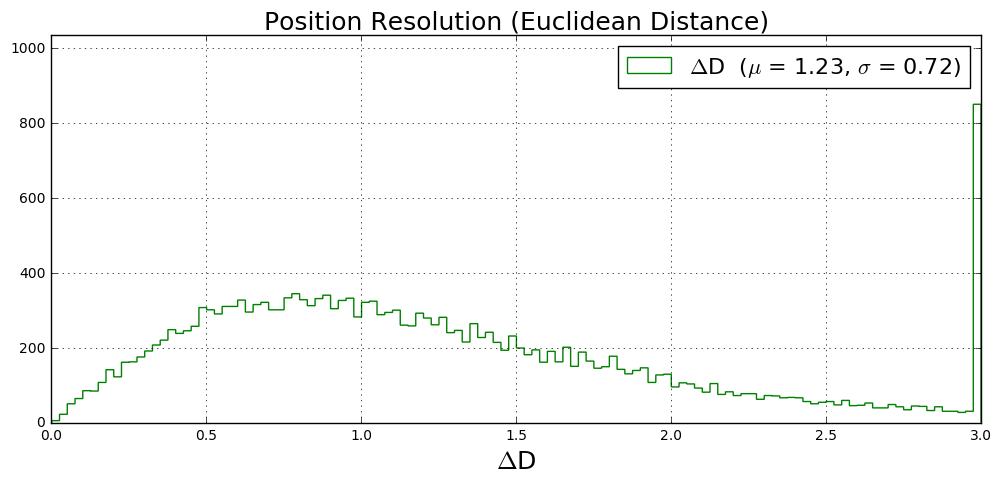

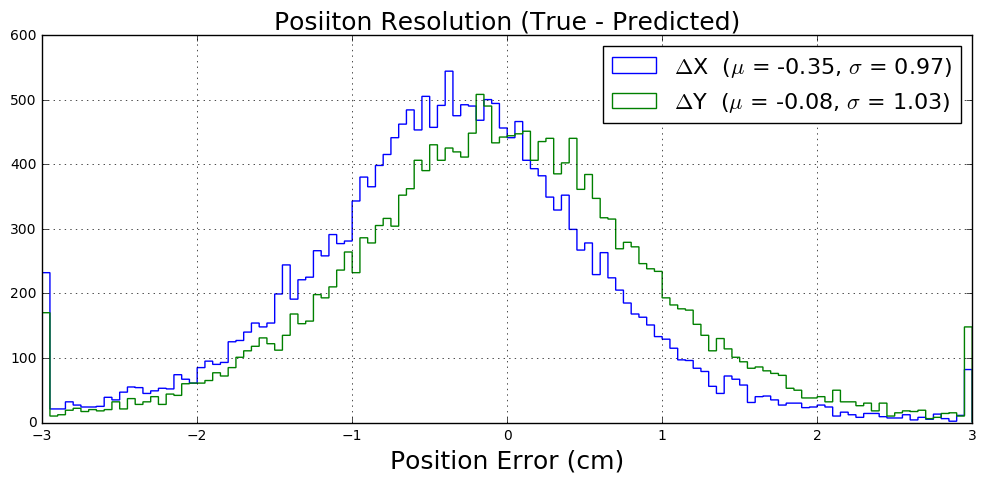

In [7]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

# Euclidean
f = plt.figure(figsize=(w, h))
plt.hist(arr_dd_true_pred, bins=dr_nbins, histtype='step', color='g', label=dd_label_true_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('Position Resolution (Euclidean Distance)', fontsize=18)
plt.xlabel('$\Delta$D', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


# X, Y
f = plt.figure(figsize=(w, h))
plt.hist(arr_dx_true_pred, bins=dr_nbins, histtype='step', color='b', label=dx_label_true_pred)
plt.hist(arr_dy_true_pred, bins=dr_nbins, histtype='step', color='g', label=dy_label_true_pred)
#plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('Posiiton Resolution (True - Predicted)', fontsize=18)
plt.xlabel('Position Error (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)




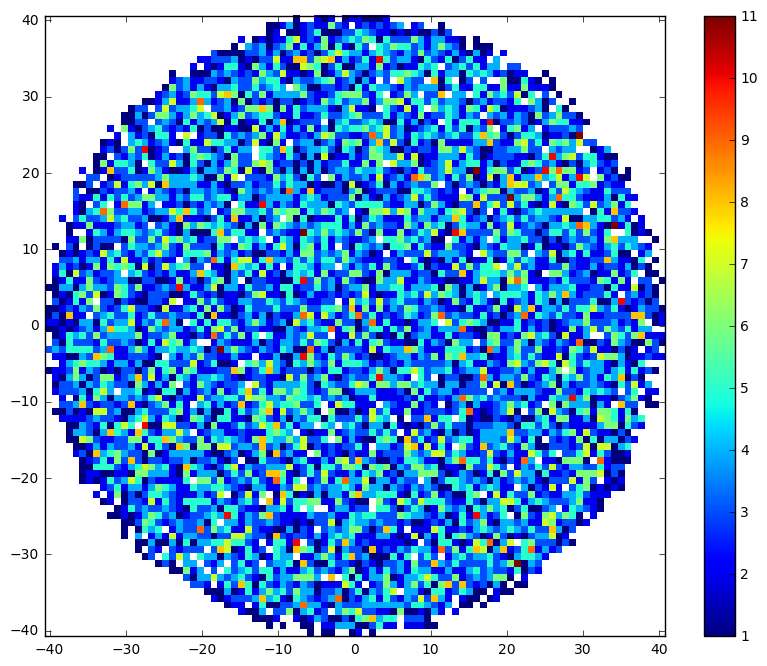

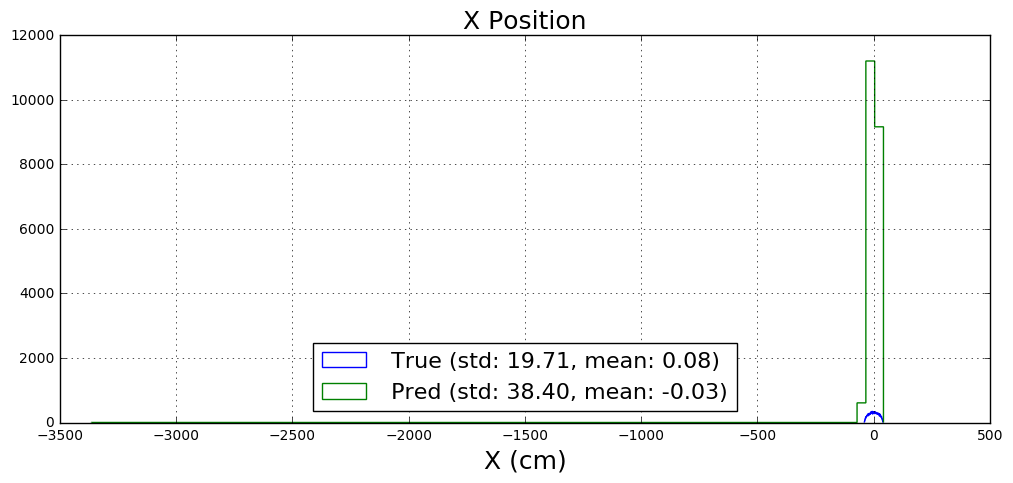

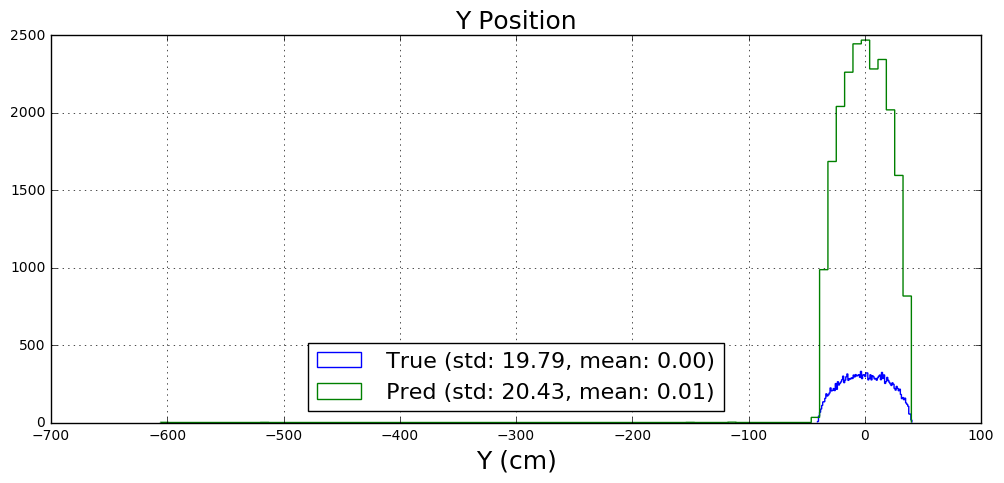

In [11]:

####################################################################################################
# Position
####################################################################################################

# x, y
f = plt.figure(figsize=(10, 8))
plt.hist2d(arr_x_true, arr_y_true, bins=r_nbins, norm=Normalize(), normed=False, cmin=0.1)

plt.colorbar()

# x
f = plt.figure(figsize=(w, h))
plt.hist(arr_x_true, bins=r_nbins, fill=False, histtype='step', label=label_x_true)
plt.hist(arr_x_pred, bins=r_nbins, fill=False, histtype='step', label=label_x_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

# y
f = plt.figure(figsize=(w, h))
plt.hist(arr_y_true, bins=r_nbins, fill=False, histtype='step', label=label_y_true)
plt.hist(arr_y_pred, bins=r_nbins, fill=False, histtype='step', label=label_y_pred)
plt.xlabel('Y (cm)', fontsize=18)
plt.title('Y Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)



acc
